In [1]:
import os, sys
import numpy as np
from scipy.optimize import fmin_slsqp
from scipy import optimize
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from sympy import *

In [2]:
def obj(x, *args):
    xa = np.linspace(-1,1,1000)
    #res = integrate((x+c[0])*(x+c[1])*(x+c[2])+(x+c[3])*(x+c[4])*(x+c[5])+(x+c[6])*(x+c[7])+(x+c[8])*(x+c[9]),x)
    #f = lambdify(x, res, "numpy")
    f = x[0]/((xa+x[5])**3)+x[1]/((xa+x[6])**2)+x[2]*((xa+x[7])**3)+x[3]*(xa+x[8])**2+x[4]*(xa+x[9])**3-x[10]
    ab = np.abs(xa)

    mse = np.square(np.subtract(f, ab)).mean()

    return mse

In [3]:
def get_function(x):
    xa = np.linspace(-1,1,1000)
    f = x[0]/((xa+x[5])**3)+x[1]/((xa+x[6])**2)+x[2]*((xa+x[7])**3)+x[3]*(xa+x[8])**2+x[4]*(xa+x[9])**3-x[10]
    #res = integrate((x+c[0])*(x+c[1])*(x+c[2])+(x+c[3])*(x+c[4])*(x+c[5])+(x+c[6])*(x+c[7])+(x+c[8])*(x+c[9]),x)
    #f = lambdify(x, res, "numpy")
    return xa, f

In [4]:
x0 = [1.0 for n in range(11)]
bounds = [(-1.0e10,1.0e10) for n in range(4)]
bounds[2] = (0.0,0.2)

In [5]:
def print_fun(x, f, accepted):
    print("at minima %e accepted %d" % (f, int(accepted)))

In [6]:
minimizer_kwargs = {"method": "BFGS"}
#minimizer_kwargs = {"method": "Nelder-Mead"}
res = optimize.basinhopping(obj, x0, minimizer_kwargs=minimizer_kwargs, callback=print_fun)
print(res)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/optimize.py:697: RuntimeWarning: invalid value encountered in double_scalars
  df = (f(*((xk + d,) + args)) - f0) / d[k]


at minima 3.635511e-03 accepted 1
at minima 3.365086e+00 accepted 0
at minima 5.265712e-03 accepted 1
at minima 1.000760e+02 accepted 0
at minima 4.378912e-03 accepted 1
at minima 4.194552e-03 accepted 1
at minima 4.600391e-03 accepted 1
at minima 1.715272e-02 accepted 1
at minima 5.216786e-03 accepted 1
at minima 5.218851e-03 accepted 1
at minima 2.052263e-03 accepted 1
at minima 1.554057e-03 accepted 1
at minima 1.552233e-03 accepted 1
at minima 1.552252e-03 accepted 1
at minima 1.552332e-03 accepted 1
at minima 1.552163e-03 accepted 1
at minima 1.552170e-03 accepted 1
at minima 1.552122e-03 accepted 1
at minima 1.551964e-03 accepted 1
at minima 1.551878e-03 accepted 1
at minima 1.551875e-03 accepted 1
at minima 1.552029e-03 accepted 1
at minima 1.552088e-03 accepted 1
at minima 1.552335e-03 accepted 1
at minima 1.552179e-03 accepted 1
at minima 5.437057e-03 accepted 1
at minima 5.217616e-03 accepted 1
at minima 5.219426e-03 accepted 1
at minima 5.216782e-03 accepted 1
at minima 5.22

In [7]:
print(res.x)

[ -74.97096932 -172.10392144   -1.49121723    2.3508149    -0.50748864
   16.54887568    3.32002213   -1.57284662    2.16091127    2.35397624
   -5.59404313]


In [8]:
#xa, f = get_function([0.95580826,  0.72239233,  0.14760652, -0.13288015,  0.93656345])
xa, f = get_function(res.x)
ab = np.abs(xa)

(-1.1, 1.1)

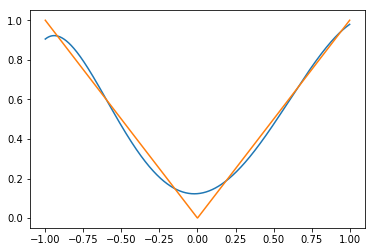

In [9]:
plt.plot(xa,f)
plt.plot(xa,ab)
plt.xlim(-1.1,1.1)